# 13 Week 그래프 만들기 (Seaborn)

In [1]:
# 그래프를 만들 때 많이 사용하는 패키지 Seaborn

import pandas as pd
import seaborn as sb

##### 산점도 만들기

In [2]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Axes: xlabel='displ', ylabel='hwy'>

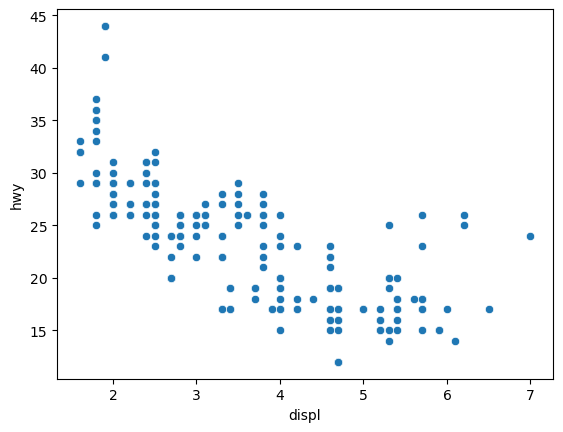

In [3]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
sb.scatterplot(data = mpg, x = 'displ', y = 'hwy')

###### 축 범위 설정하기: 데이터 전체가 아니라 일부만 표현하고 싶을 때 축 범위를 설정하면 된다. | sb.set()의 xlim, ylim을 이요해 설정 가능

[(3.0, 6.0)]

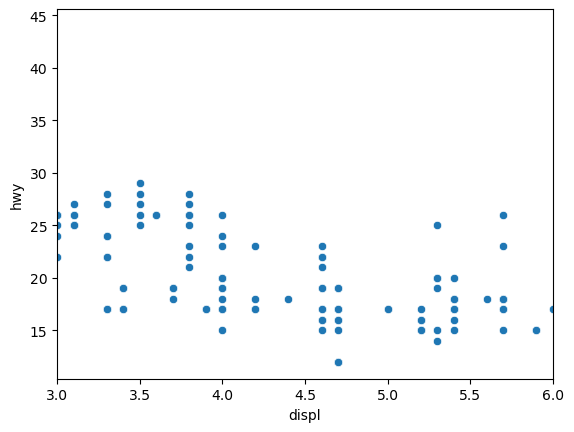

In [4]:
sb.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
  .set(xlim = [3,6])

[(10.0, 30.0)]

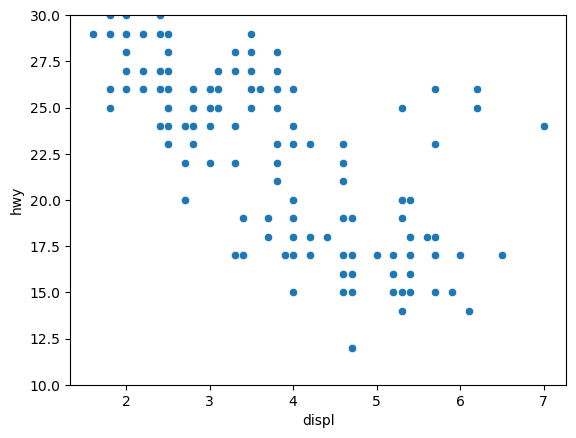

In [5]:
sb.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
  .set(ylim = [10,30])

[(3.0, 6.0), (10.0, 30.0)]

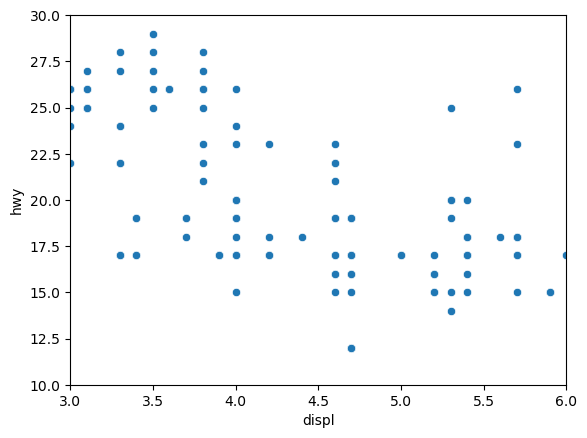

In [6]:
sb.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
  .set(xlim = [3,6], ylim = [10,30])

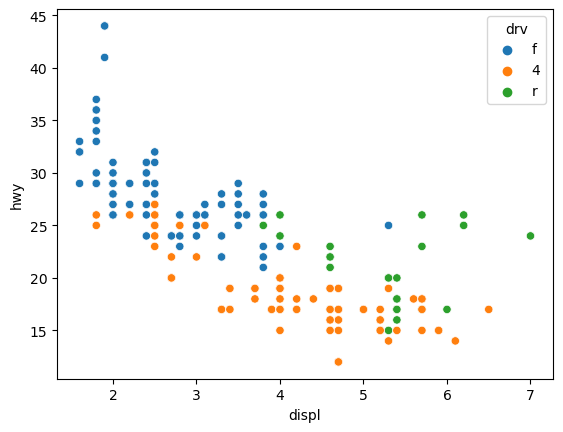

In [7]:
# 종류별로 표식 색깔 바꾸기 (hue)

# drv(구동 방식)에 따라 표식의 색깔을 다르게 표현한 산점도
#설명 메시지 숨기기: 그래프 출력 코드 뒤에 ;를 입력하면 설명 메시지가 출력되지 않음
sb.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

###### ------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
"""
import matplotlib.pyplot as plt
plt.rcParams.updata({
                    'figure.dpi' : 150,
                    'figure.figsize' : [5,6],
                    'font.size' : '15',
                    'font.family' : 'Malgun Gothic'})

                    # figure.dpi => 해상도
                    # figure.figsize => 가로, 세로 크기
                    # font.size => 글자 크기
                    # font.family => 폰트 (그래프에 한글이 있을 경우 폰트를 맑은 고딕과 같은 한글 폰트로 바꾸면 깨지지않고 정상적으로 출력된다.)
                    
설정 되돌리기 plt.rcParams.updata(plt.rcParamsDefault)
""";

##### 막대 그래프(barplot) | 집단 간 차이 표현하기

###### 1. 집단별 평균표 만들기

In [9]:
dfMpg = mpg.groupby('drv') \
            .agg(meanHwy = ('hwy', 'mean'))
dfMpg.head()

,meanHwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [10]:
#drv가 인덱스로 바뀌면 안 되기 때문에 인덱스를 따로 만들어주려면 as_index = False
dfMpg = mpg.groupby('drv', as_index = False) \
            .agg(meanHwy = ('hwy', 'mean'))
dfMpg.head()

,drv,meanHwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


###### 2. 그래프 만들기

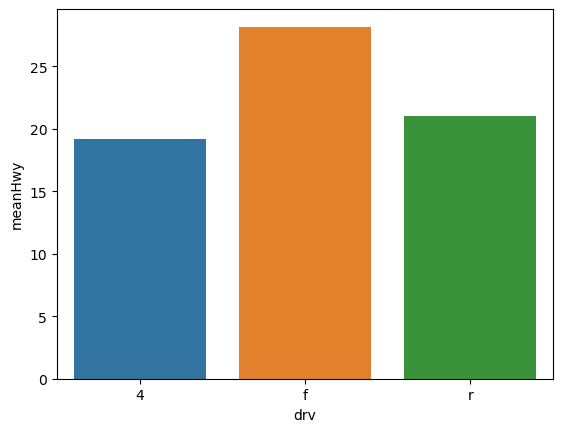

In [11]:
sb.barplot(data = dfMpg, x = 'drv', y = 'meanHwy');

###### 3. 크기순으로 정렬하기

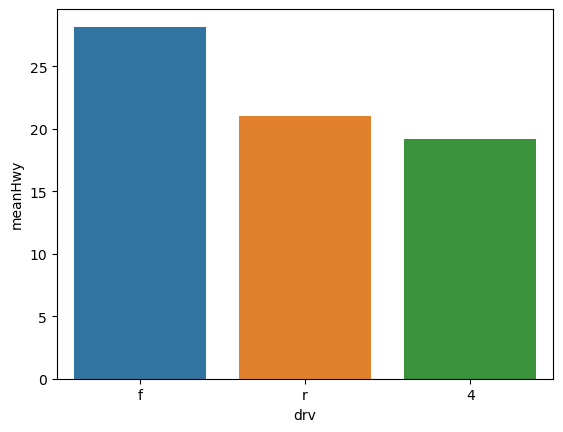

In [16]:
# 데이터 프레임 정렬
# 내림차순 ascending = False
dfMpg = dfMpg.sort_values('meanHwy', ascending = False)

# 막대 그래프 만들기
sb.barplot(data = dfMpg, x = 'drv', y = 'meanHwy');

##### 빈도 막대 그래프 만들기

###### 1. 집단별 빈도표 만들기

In [18]:
# drv의 빈도 수치로 막대 그래프 만들기

# 집단별 빈도표
dfMpg = mpg.groupby('drv', as_index = False) \
           .agg(n = ('drv', 'count'))

dfMpg.head()

,drv,n
0,4,103
1,f,106
2,r,25


###### 2. 그래프 만들기

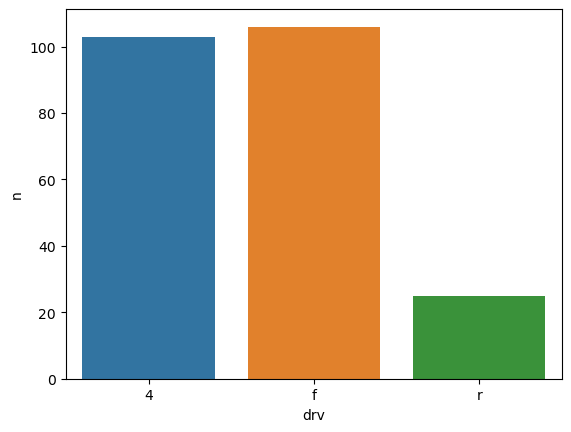

In [20]:
sb.barplot(data = dfMpg, x = 'drv', y ='n');

###### .countplot()으로 빈도 막대 그래프 만들기 (위 과정을 모두 생략할 수 있음)

<Axes: xlabel='drv', ylabel='count'>

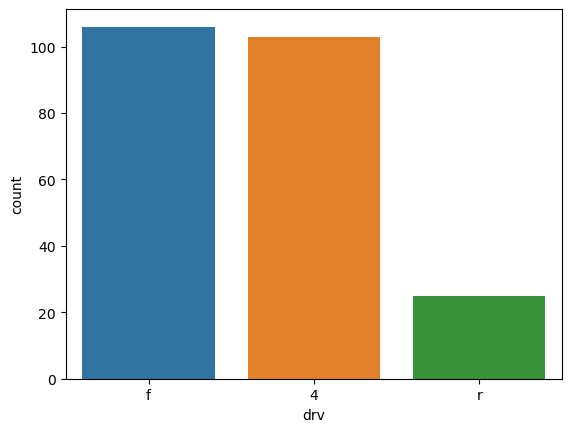

In [21]:
sb.countplot(data = mpg, x = 'drv')

###### unique()를 이용하면 값의 순서를 알 수 있고, order = []에 원하는 순서 값을 입력하면 수정이 가능하다.

<Axes: xlabel='drv', ylabel='count'>

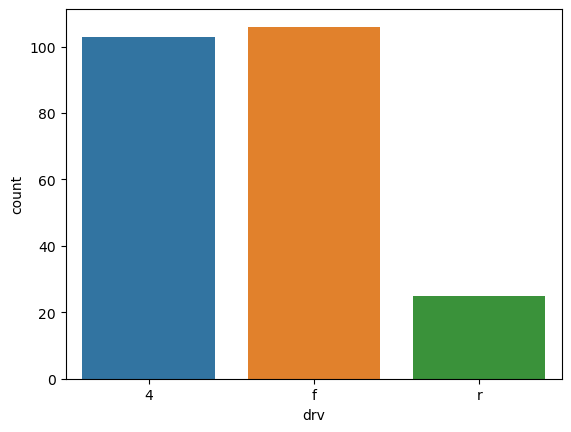

In [22]:
sb.countplot(data = mpg, x='drv', order=['4', 'f', 'r'])

###### 또는 value_counts().index를 사용하면 빈도가 높은 순으로 변수의 값을 출력하는 기능이 있다.

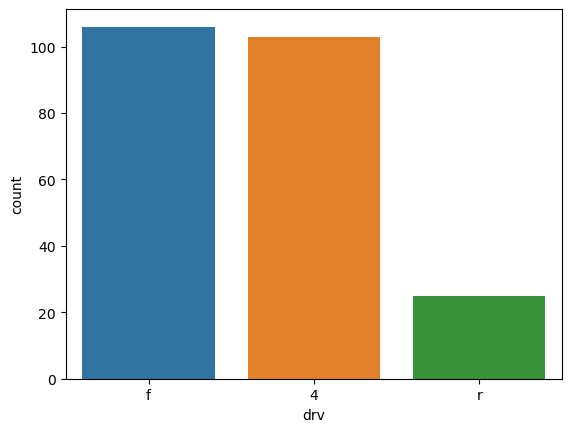

In [26]:
sb.countplot(data = mpg, x = 'drv',
            order = mpg['drv'].value_counts().index);

##### 선 그래프(lineplot) | 시간에 따라 달라지는 데이터

In [30]:
# 시계열 그래프 만들기

economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

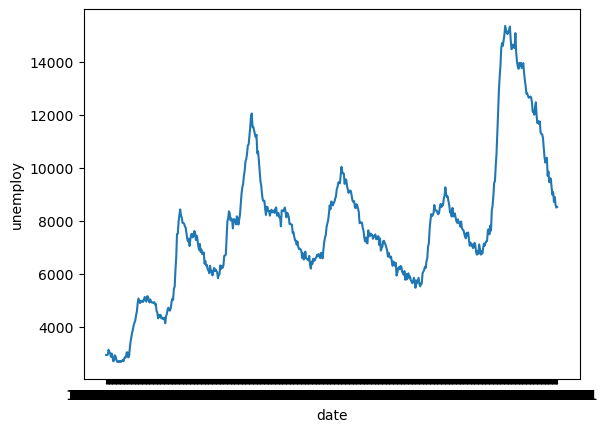

In [32]:
sb.lineplot(data = economics, x = 'date', y = 'unemploy')
# X축에 굵은 선이 표시되어 있는데 이것은 '연월일'을 나타낸 문자가 겹쳐져 굵은선으로 표시된 것

In [33]:
# 날짜 시간 타임 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [36]:
print(economics[['date', 'date2']]) # 값이 달라지지 않음을 알 수 있음

           date      date2
0    1967-07-01 1967-07-01
1    1967-08-01 1967-08-01
2    1967-09-01 1967-09-01
3    1967-10-01 1967-10-01
4    1967-11-01 1967-11-01
..          ...        ...
569  2014-12-01 2014-12-01
570  2015-01-01 2015-01-01
571  2015-02-01 2015-02-01
572  2015-03-01 2015-03-01
573  2015-04-01 2015-04-01

[574 rows x 2 columns]


###### 변수가 날짜 시간 타입으로 되어 잇으면 df.dt를 이용해 연, 월, 일을 출력할 수 있다.

In [38]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [40]:
# 월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [41]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [43]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

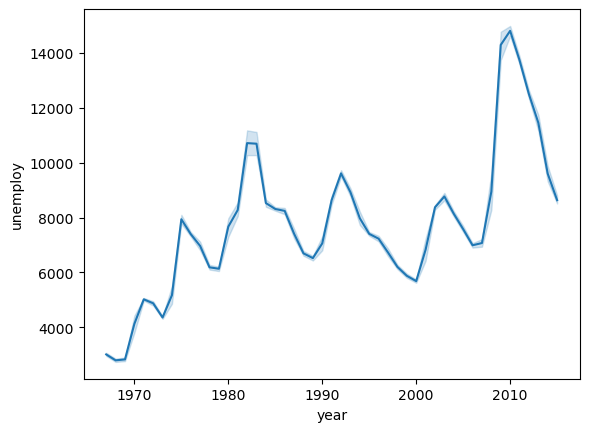

In [45]:
# x축에 연도 표시
sb.lineplot(data = economics, x = 'year', y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

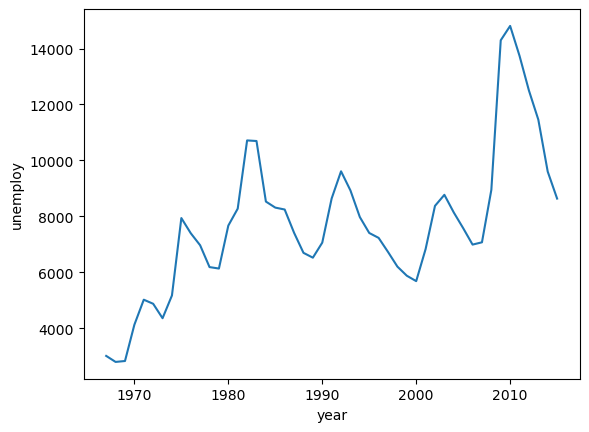

In [52]:
# 신뢰구간 CI(confidence interval) 제거


# sb.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

sb.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None) # 'ci = None'에서 ci 매개변수는 이제 사용하지 않고 'errorbar = None'을 사용한다고 함

##### 상자 그림(boxplot) | 집단 간 분포 차이 표현하기

<Axes: xlabel='drv', ylabel='hwy'>

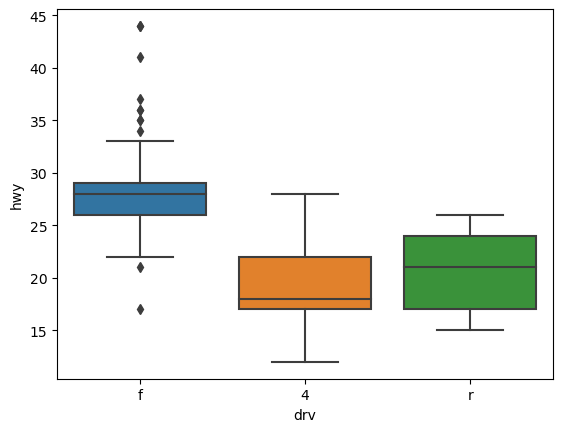

In [53]:
sb.boxplot(data = mpg, x = 'drv', y = 'hwy')

In [54]:
# 상자 그림의 요소가 나타내는 값

boxplotValue = pd.DataFrame({'상자 그림' : ['상자 아래 세로선', '상자 밑면', '상자 내 굵은 선', '상자 윗면', '상자 위 세로선', '상자 밖 가로선', '상자 밖 점 표식'],
                            '값' : ['아랫수염', '1사분위수 Q1', '2사분위수 Q2', '3사분위수 Q3', '윗수염', '극단치 경계', '극단치'],
                            '설명' : ['하위 0~25% 내에 해당하는 값', '하위 25% 위치 값', '하위 50% 위치 값(중앙값)', '하위 75% 위치 값',
                                    '하위 75~100% 내에 해당하는 값', 'Q1, Q3 밖 1.5 IQR 내 최대값', 'Q1, Q3 밖 1.5 IQR을 벗어난 값']})
boxplotValue

,상자 그림,값,설명
0,상자 아래 세로선,아랫수염,하위 0~25% 내에 해당하는 값
1,상자 밑면,1사분위수 Q1,하위 25% 위치 값
2,상자 내 굵은 선,2사분위수 Q2,하위 50% 위치 값(중앙값)
3,상자 윗면,3사분위수 Q3,하위 75% 위치 값
4,상자 위 세로선,윗수염,하위 75~100% 내에 해당하는 값
5,상자 밖 가로선,극단치 경계,"Q1, Q3 밖 1.5 IQR 내 최대값"
6,상자 밖 점 표식,극단치,"Q1, Q3 밖 1.5 IQR을 벗어난 값"
